In [18]:
import networkx as nx
import numpy as np
import random
def simulate_dynamic_move(G, target_nodes_init, steps, move_prob=0.5):
    G_attack = G.copy()
    target_nodes = list(target_nodes_init)
    n_targets = len(target_nodes)
    attacked_nodes = set()
    step = 0
    target_array = np.zeros((steps, n_targets), dtype=int)

    while step < steps:
        new_target_nodes = [None] * n_targets
        occupied = set()
        for i, node in enumerate(target_nodes):
            if random.random() < move_prob:
                neighbors = list(G_attack.neighbors(node))
                candidates = [nbr for nbr in neighbors
                              if nbr not in attacked_nodes and nbr not in target_nodes and nbr not in occupied]
                if candidates:
                    new_node = random.choice(candidates)
                else:
                    new_node = node
            else:
                new_node = node
            new_target_nodes[i] = new_node
            occupied.add(new_node)
        target_nodes = new_target_nodes
        target_array[ step, :] = np.array(target_nodes, dtype=int)
        step += 1
    return target_array
n = 100
# G = nx.barabasi_albert_graph(n, 4, seed=42)
G = nx.watts_strogatz_graph(n, 8, 0.1, seed=42)
target_num = int(n * 0.05)
target_nodes_random = random.sample(list(G.nodes()), target_num)
target_array = simulate_dynamic_move(G, target_nodes_random, steps=2000)

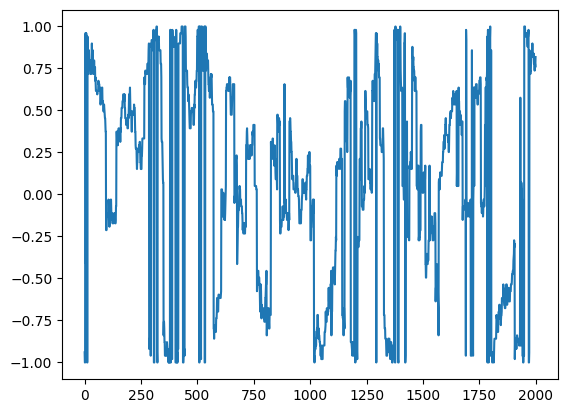

In [20]:
import matplotlib.pyplot as plt
X=target_array
X = 2 * (X - X.min()) / (X.max() - X.min()) - 1
target_array=X
plt.figure()
plt.plot(target_array[:,0])
#plt.plot(target_array[:,1])
#plt.plot(target_array[:,2])
#plt.plot(target_array[:,3])
#plt.plot(target_array[:,4])